# Algorithms and Machine Learning

## Target function

One of the most imporant decision we have to make as data scientists is to define what constitutes success. 

This is an important concept that often gets overlooked. Results depend on our measure of success, and we should be informed about the choices that we made or the function that we are using has made for us.

Today, we are going to discuss these concepts with an example with real data.

As usual, we start by loading the Python packages that we are going to use in the analysis.

In [611]:
import numpy as np #Package for numerical multidimensional tables
import pandas as pd #Package for data frames
import matplotlib.pyplot as plt #Package for plots and graphs

Over the years, I have had a discussion with colleagues about if Quentin Tarantino is a good director or merely over-hyped.

To give the discussion some objective dimension, we decided to look at the ratings from Tarantino's movies through the years. The data comes from Rotten Tomatoes and it is saved in the 'RT_Tarantino.csv' file

We first load the data using a pandas data frame. And we print it.

In [612]:
data = pd.read_csv ('RT_Tarantino.csv')
print(data)

    Rating                                              Title  Year  License
0     0.88             What She Said: The Art of Pauline Kael  2019      140
1     0.86                                     Friedkin Uncut  2019      110
2     0.85                      Once Upon a Time In Hollywood  2019       90
3     0.75                                  The Hateful Eight  2015       50
4     0.44                               She's Funny That Way  2015      110
5     0.87                                   Django Unchained  2012      140
6     0.92      Corman's World: Exploits Of A Hollywood Rebel  2011      110
7     0.89                               Inglourious Basterds  2009       50
8     0.33                                           Killshot  2008       90
9     0.56                            Sukiyaki Western Django  2008       50
10    0.10                                          Hell Ride  2008       90
11    0.95  Not Quite Hollywood: The Wild, Untold Story of...  2008      110

The dataset inclues ratings, title, year of release, and license cost for all Tarantino movies with a rating in Rotten Tomatoes. The data is presented in descending order through the years.

The simplest way to decide if Tarantino is a good director is to look at the rating of his latest movie. 

In [613]:
data['Rating'][0]

0.88

This is certainly a valid measurement but it has some drawbacks. 

In particular, our whole decision depends on only the latest observation. 

Thus, it could change widly from year to year. For instance, we could get a completely different result if we had this discussion in 2008.

In [614]:
list2008 = data[['Rating','Title','Year','License']][data['Year']<=2008]
print(list2008)

    Rating                                              Title  Year  License
8     0.33                                           Killshot  2008       90
9     0.56                            Sukiyaki Western Django  2008       50
10    0.10                                          Hell Ride  2008       90
11    0.95  Not Quite Hollywood: The Wild, Untold Story of...  2008      110
12    0.62                                  Diary of the Dead  2007      190
13    0.74  Planet Terror (Grindhouse Presents: Robert Rod...  2007      190
14    0.44                                     Hostel Part II  2007       50
15    0.84                                         Grindhouse  2007       90
16    0.64                                        Death Proof  2007       90
17    0.61                                             Hostel  2006      110
18    0.07                                     Daltry Calhoun  2005      120
19    0.30                          The Muppets' Wizard of Oz  2005      110

As before, we look at the last rating available.

In [615]:
print(list2008.iloc[0]) 

Rating         0.33
Title      Killshot
Year           2008
License          90
Name: 8, dtype: object


Instead of looking at the last rating we could look at the average rating for the last year.

In [616]:
decision2019 = np.mean(data['Rating'][data['Year']==2019])
print(decision2019)

0.8633333333333333
0.485


Or some other year of your choice.

In [ ]:
decision2008 = np.mean(data['Rating'][data['Year']==2008])
print(decision2008)

Alternatively, we could consider the average for all his movies.

In [617]:
np.mean(data['Rating'])

0.6142857142857142

Considering all the data makes the measurement fairer in the sense that does not depent too much on anyone observation. 

Nonetheless, we may miss some important dynamics of his movies. Like, maybe Tarantino is directing better-rated movies now that when he started filming.

As with most methods in statistical analysis, there are trade-offs to all decisions.

## Fitting a Model

Looking at the results through the years, there seems to be an increasing trend in the ratings. 

We can plot the data to *see* if our intention is correct.

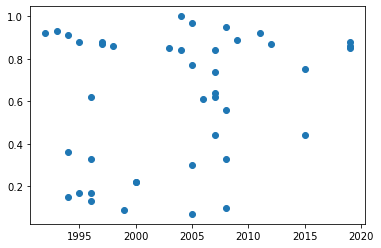

In [618]:
plt.scatter(data['Year'],data['Rating'])

There does seems to be a slightly increasing trend on the ratings. Notice how the last movies have obtained hight ratings.

We may be able to model this trend using a simple line.

Thus, we try to *fit* the model
$$Rating_i = \alpha + \beta Year_i + \epsilon_i,$$
where $\alpha$ and $\beta$ are selected according to some fit criteria. 

In the linear model above, the $\epsilon_i$ allows us to capture random variations in the data that may not be explained using the linear fit.

Thus, one intuitive way to select $\alpha$ and $\beta$ is to make them minimize the unexplained variations, $\epsilon_i$. 

Let us call $\widehat{Rating}_i$ to the rating assigned by the linear model. We may thus look to minimize
$$\min_{\alpha,\beta} \epsilon_i = \min_{\alpha,\beta} Rating_i-\widehat{Rating}_i = \min_{\alpha,\beta} Rating_i-\alpha-\beta Year_i$$

There are two possible drawbacks with the above problem statement:
* It is only based on one observation
* It will get us undetermined solutions

Why?

* As was the case before with the simple mean, making our decision looking at just one observation may result in wildly different results depending on which observation we are looking at. So instead, we could take some certain combination of more values.
* Notice that if we make $\alpha$ smaller and smaller we get smaller values for $\epsilon_i$. 

## Loss Function

Thus, we must decide on a proper **loss function**.

Our choice regarding the number and characteristics of the observations used, and the function used to weight them, produce different results.

The classical linear regression proposes the loss function:
$$\mathcal{L}(\alpha,\beta) = \sum_{i=1}^N (Rating_i-\alpha-\beta Year_i)^2,$$
where $N$ is the number of observations used in the computations.

Notice that nothing forces us to choose the square as the weighting function, we could have used absolute value or a higher degree polynomial.

Once we have selected our fit criteria (or loss function), we should decide how are we going to solve it. 

In this case, solving it translates to mininize the loss function.

There are several options to look for a solution depending on the complexity of the problem at hand:
* Try different combinations of $\alpha$ and $\beta$ and select the one with the smallest loss.
* Start on a (possibly random) combination and use the data itself to point us to a better combination.
* Solve the problem analytically. 

## Grid Search

We start with the more intuitive way to look for a solution: grid search.

The idea behind grid search is to set up a list or *grid* of values and then *search* for the optimal one. 

That is, we set a list of possible values for $\alpha$ and $\beta$, evaluate the loss function on them, and select the one that achieves the smallest values

In [619]:
params = [[0.2, 0.0001], [0.2, 0.00005], [0.5, 0.0001], [0.5,0.00005]]

Ratings = data['Rating']
Year = data['Year']

In [620]:
gs = []
gs.append(sum( (Ratings-params[0][0]-params[0][1]*Year)**2))
gs.append(sum( (Ratings-params[1][0]-params[1][1]*Year)**2))
gs.append(sum( (Ratings-params[2][0]-params[2][1]*Year)**2))
gs.append(sum( (Ratings-params[3][0]-params[3][1]*Year)**2))
print(gs)

[5.87112315, 8.0952042875, 4.260423150000001, 3.9598542875000007]


In [621]:
print(min(gs))
print(np.argmin(gs))
est_par = params[np.argmin(gs)]

3.9598542875000007
3


We plot the fitted model using the estimated parameters.

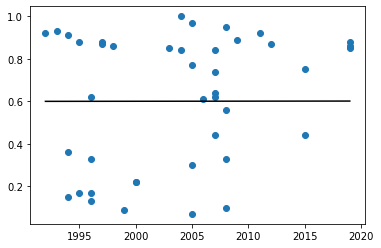

In [622]:
plt.scatter(data['Year'],data['Rating'])
plt.plot([1992, 2019],[est_par[0]+est_par[1]*1992, est_par[0]+est_par[1]*2019],'k-')

We can try more values easily dy defining a function.

In [623]:
def loss_function(params,Ratings,Year):
    loss = sum( (Ratings-params[0]-params[1]*Year)**2)
    return(loss)

loss_function([0,0.0001],Ratings,Year)

11.144923150000002

We can then make a list as big as we want to make the grid search.

In [624]:
params = [[0.2, 0.0001], [0.2, 0.00005], [0.5, 0.0001], [0.5,0.00005],[0, 0.0001], [0, 0.00005], [0.1, 0.0001], [0.1,0.00005]]
n = len(params)

results = []
for i in range(0,n):
    results.append(loss_function(params[i],Ratings,Year))

print(results)

[5.87112315, 8.0952042875, 4.260423150000001, 3.9598542875000007, 11.144923150000002, 15.052104287499997, 8.088023150000001, 11.153654287499997]


And we plot the line using the new estimates.

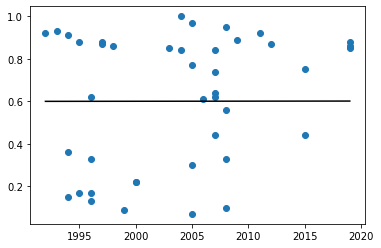

In [625]:
est_par = params[np.argmin(results)]
plt.scatter(data['Year'],data['Rating'])
plt.plot([1992, 2019],[est_par[0]+est_par[1]*1992, est_par[0]+est_par[1]*2019],'k-')

## Gradient Descent

Another possible solution to our minimization algorithm is to start at a (possibly random) value and let the data itself tell us how to improve the fit. 

Mathematically, we know that the function decreases in the opposite direction of the derivative. This motivates to look for improvement in our loss function in the direction of the derivative.

Thus, starting from some initial values, we update them as follows:

$$\alpha^{new} = \alpha^{old}-\frac{\mathcal{L}(\alpha,\beta)}{\partial{\mathcal{L}(\alpha,\beta)}/\partial{\alpha}},$$
$$\beta^{new} = \beta^{old}-\frac{\mathcal{L}(\alpha,\beta)}{\partial{\mathcal{L}(\alpha,\beta)}/\partial{\beta}},$$
and we iterate until our parameters do not change (too much).

For our purposes, we have already obtained the derivatives, they are given by:

$$\frac{\partial{\mathcal{L}(\alpha,\beta)}}{\partial{\alpha}} = -2\sum_{i=1}^N(Rating_i-\alpha-\beta Year_i),$$
$$\frac{\partial{\mathcal{L}(\alpha,\beta)}}{\partial{\beta}} = -2\sum_{i=1}^N(Rating_i-\alpha-\beta Year_i)Year_i,$$

Which we define in Python below.

In [626]:
def gradient_alpha(params,Ratings,Year):
    galpha = -2*sum( (Ratings-params[0]-params[1]*Year) )
    return(galpha)

def gradient_beta(params,Ratings,Year):
    gbeta = -2*sum( (Ratings-params[0]-params[1]*Year)*Year)
    return(gbeta)

With the newly defined functions, we can update the values of our estimates.

In [627]:
alpha_new = est_par[0] - loss_function(est_par,Ratings,Year)/gradient_alpha(est_par,Ratings,Year)
beta_new = est_par[1] - loss_function(est_par,Ratings,Year)/gradient_beta(est_par,Ratings,Year)

print([alpha_new, beta_new])
est_par = [alpha_new, beta_new]

[3.8430597615027433, 0.0016864599702409544]


And we can plot the results with the last updated values.

[3.8430597615027433, 0.0016864599702409544]


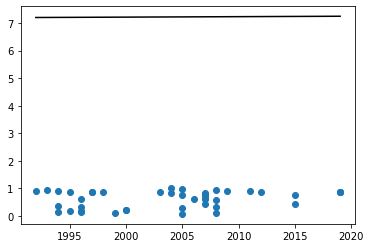

In [628]:
print(est_par)
plt.scatter(data['Year'],data['Rating'])
plt.plot([1992, 2019],[est_par[0]+est_par[1]*1992, est_par[0]+est_par[1]*2019],'k-')

More efficiently, we can set a *for* loop to update the values.

[0.6626835477523896, 9.494230979334626e-05]


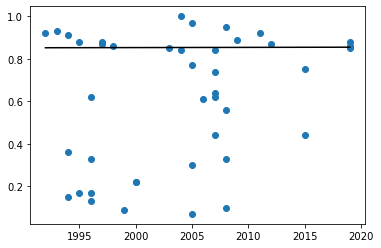

In [629]:
est_par = [0.2,0.00001]
for i in range(1,1000):
    alpha_new = est_par[0] - loss_function(est_par,Ratings,Year)/gradient_alpha(est_par,Ratings,Year)
    beta_new = est_par[1] - loss_function(est_par,Ratings,Year)/gradient_beta(est_par,Ratings,Year)
    est_par = [alpha_new, beta_new]


And we plot the results with the last update.

In [ ]:
print(est_par)
plt.scatter(data['Year'],data['Rating'])
plt.plot([1992, 2019],[est_par[0]+est_par[1]*1992, est_par[0]+est_par[1]*2019],'k-')

## Analytical Solution

For some problems, we may be able to obtain the analytical solution with pen and paper. 

Turns out, this is one of those examples. 

The solution is given by:

$$\hat{\beta} = \frac{ \sum_{i=1}^N(Rating_i-\overline{Rating})(Year_i-\overline{Year})}{\sum_{i=1}^N(Year_i-\overline{Year})^2}$$

$$\hat{\alpha} = \overline{Rating}-\hat{\beta}\overline{Year},$$
where the bar on top means average.

We program this into Python to obtain the analytical solutions.

In [630]:
beta_sol = sum( (Ratings-np.mean(Ratings))* (Year-np.mean(Year)) )/ sum( (Year-np.mean(Year))**2 )
alpha_sol = np.mean(Ratings)-beta_sol*np.mean(Year)
est_par = [alpha_sol,beta_sol]
print(est_par)

[-19.32508663177684, 0.009951323611605101]


And we plot the resulting model.

[-19.32508663177684, 0.009951323611605101]


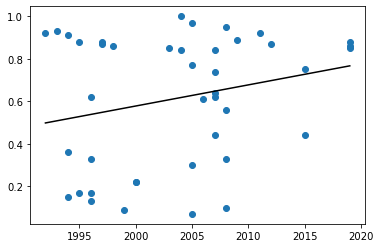

In [631]:
print(est_par)
plt.scatter(data['Year'],data['Rating'])
plt.plot([1992, 2019],[est_par[0]+est_par[1]*1992, est_par[0]+est_par[1]*2019],'k-')

Exercise: What about the license cost to watch the movie?

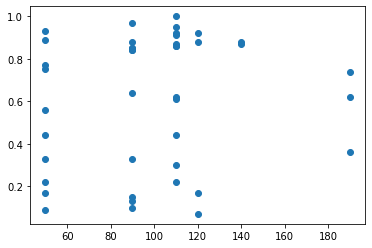

In [632]:
plt.scatter(data['License'],data['Rating'])

# Statistical Analysis

The analysis above, gave us some values for the parameters in the linear model we considered. 

In particular, we found a positive value for the effect that $Year$ has on $Rating$; thus, it may seem that Tarantino's movies have been better received on average as times goes by. 

Yet, we may be interested in knowing if this result is a fluke (something due to chance given that we *randomly* decided to run the experiment *today*), or if there is perhaps some true better reception to his movies.

Hence, we would like to be able to say if the *positive* effect that $Year$ has on $Rating$ is **statistically significant**.

There are two *cultures* regarding how to analyze if a result is significant:
* Make a set of assumptions regarding the data and obtain analytical results
* Use the data itself to check for the significance of the results

As before, the methods above have advantages and disadvantages. 

### Normality Assumption

If we are willing to assume that our data follows a specific probability distribution (typically a Normal distribution), then we know that the estimated parameter follows a Normal distribution. In particular

$$\hat{\beta}\sim \mathcal{N}(\beta,\sigma^2_\beta)$$

Which tells us that our estimate is going to fall around the *true* value. 

Now, if the true value is non-zero, that would make it more likely that our estimate is non-zero. 

Moreover, the variance (how far our estimate can fall from the true value) decreases with the sample size. Thus, if our data is large enough, we can be quite certain of our results.

Using the formula above, we can then compute the probability that it is non-zero by pure chance. 

If that probability is really small, we may be inclined to say that it is not just a random result but a true non-zero value.

For our purposes, the variance of $\hat{\beta}$ can be obtained by

$$\sigma^2_\beta = \frac{ \mathcal{L}(\hat{\alpha},\hat{\beta})/(N-2)}{\sum_{i=1}^N(Year_i-\overline{Year})^2}$$

In [633]:
sigma_beta = ( loss_function(est_par,Ratings,Year)/(len(Ratings)-2) )/ ( sum( (Year-np.mean(Year))**2 ) )
print(sigma_beta)

3.971237915758841e-05


We then plot a Normal distribution with mean 0 and variance given above.

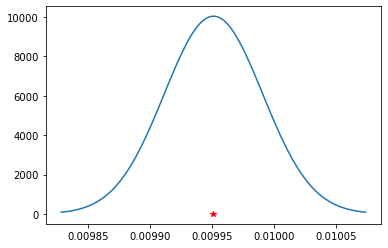

In [634]:
from scipy.stats import norm
import matplotlib.pyplot as plt
x = np.linspace(norm.ppf(0.001,loc=est_par[1],scale=sigma_beta), norm.ppf(0.999,loc=est_par[1],scale=sigma_beta), 100)

plt.plot(x, norm.pdf(x,loc=est_par[1],scale=sigma_beta))
plt.plot(est_par[1],0,'*r',lw=5)

We can check graphically if the zero value is a likely result.

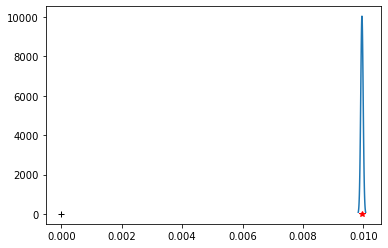

In [645]:
plt.plot(x, norm.pdf(x,loc=est_par[1],scale=sigma_beta))
plt.plot(est_par[1],0,'*r',lw=5)
plt.plot(0,0,'+k',lw=5)

As previously noted, this result relies on the Normality assumption. 

We should check if the data seems to follow a Normal distribution.

(array([ 5.,  4.,  3.,  3.,  0.,  4.,  1.,  3., 12.,  7.]),
 array([0.07 , 0.163, 0.256, 0.349, 0.442, 0.535, 0.628, 0.721, 0.814,
        0.907, 1.   ]),
 <a list of 10 Patch objects>)

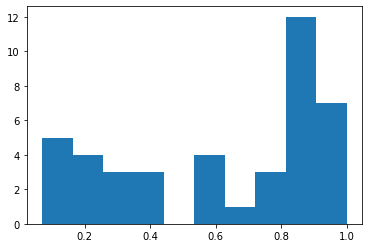

In [635]:
plt.hist(data['Rating'],bins=10)

Does it look Normal? 

What about $Year$?

(array([ 5.,  8.,  4.,  0.,  7., 10.,  1.,  2.,  2.,  3.]),
 array([1992. , 1994.7, 1997.4, 2000.1, 2002.8, 2005.5, 2008.2, 2010.9,
        2013.6, 2016.3, 2019. ]),
 <a list of 10 Patch objects>)

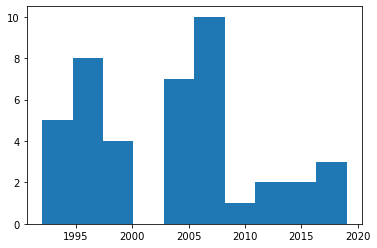

In [636]:
plt.hist(data['Year'],bins=10)

Now, even if the data does not follow a Normal distribution, it can be shown that *asymptotically* it approximates it. 

So if the sample is big, the analysis above may still be valid.

### Empirical Distributions

For certain exercises, and when the data is far from being Normal, we can use the data itself to get some sense of the statistical validity of our results.

Right now, we are producing just one general estimate of the parameters. As we did before, what if we could construct several estimates and study if they differ too much from each other.

To generate more estimates we need new datasets. The data at hand is of course limited, we do not have an infinite number of Tarantino movies to obtain a bunch of parameter estimates. 

One way to generate more estimates from the fixed dataset is to randomly select a subset of the data, solve the model and obtain parameter estimates. If we do this enough times, we can construct an empirical distribution of the parameter.

There are two main ways to generate *new* datasets from the data:
* Drop some observations and estimate the model on the rest. We then repeat the experiment dropping another groups of observations. We typically drop just one observation, thus the name **leave-one-out**.
* Randomly select a sample of the same size as the original by selection with replacement from the original dataset. The method is called **bootstrap**.


#### Leave-one-out

We start with leave-one-out. We can sequenttially drop one observation, make the analysis in the rest of the data and store the parameter estimates.

In [637]:
params_loo = []
n = len(data)

for i in range(0,n):
    aux_data = data
    aux_data = aux_data.drop(i)
    Ratings = aux_data['Rating']
    Year = aux_data['Year']
    beta_sol = sum( (Ratings-np.mean(Ratings))* (Year-np.mean(Year)) )/ sum( (Year-np.mean(Year))**2 )
    params_loo.append(beta_sol)

print(params_loo)

[0.009105871163794112, 0.009255027952399738, 0.009329606346702558, 0.009829970228250096, 0.01145363325614733, 0.009303149352740374, 0.009188961606514725, 0.00942747528404899, 0.010572825927247552, 0.010135912344409241, 0.011009739510085862, 0.009395058877857321, 0.009990899771971304, 0.009816426434593427, 0.010252609778038128, 0.00967103198677853, 0.00996182088240833, 0.009978922765500114, 0.01027065319304094, 0.010138868632149182, 0.009754974476507968, 0.009869569746848631, 0.009899539861333786, 0.009921193445626612, 0.01002457258282835, 0.00937092889307781, 0.00937092889307781, 0.00896234942925014, 0.010714346053937625, 0.010912913295534179, 0.010942749145271923, 0.008543888520806174, 0.00868195516040095, 0.009234221718780054, 0.01023520485584219, 0.01133523522445903, 0.008545376251480242, 0.008326060053409762, 0.011683927136933066, 0.009253891747541201, 0.012028007275755514, 0.012245632293350467]


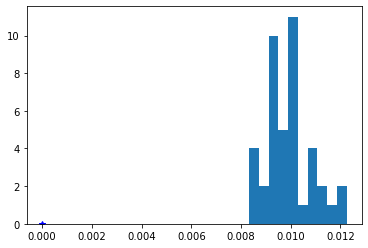

In [638]:
plt.hist(params_loo)
plt.plot(0,0,'*b')

We obtain the mean and variance of the estimates.

In [639]:
print(np.mean(params_loo))
print(np.var(params_loo))

0.009951093603731698
8.402764002498839e-07


#### Bootstrap

In [640]:
params_boot = []

for i in range(0,1000):
    subsample = np.random.choice(range(0,n),n)
    aux_data = data.iloc[subsample][:]
    Ratings = aux_data['Rating']
    Year = aux_data['Year']
    beta_sol = sum( (Ratings-np.mean(Ratings))* (Year-np.mean(Year)) )/ sum( (Year-np.mean(Year))**2 )
    params_boot.append(beta_sol)

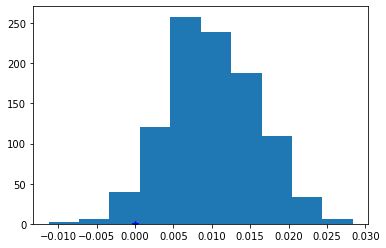

In [641]:
plt.hist(params_boot)
plt.plot(0,0,'*b')

We obtain the mean and variance of the estimates.

In [642]:
print(np.mean(params_boot))
print(np.var(params_boot))

0.010087465463930334
3.4033059748127274e-05
